In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
%matplotlib notebook
%matplotlib inline
from pandas import Series, DataFrame
from sklearn import linear_model
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from timeit import default_timer as timer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [6]:
# load the file

houseData = pd.read_csv("kadikoy.csv", keep_default_na=False)

houseData.head()


,Id,Neighborhood,Date,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
0,644083584,Egitim,9.05.2019,167.0,65.0,75.0,3.0,30.0,1.0,4.0,1.0,1.0,0.0,1.0
1,696137168,Hasanpasa,28.05.2019,175.0,95.0,100.0,3.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0
2,696813140,Hasanpasa,31.05.2019,199.0,55.0,65.0,2.0,4.0,-1.0,3.0,1.0,0.0,0.0,0.0
3,670399423,Hasanpasa,20.05.2019,220.0,70.0,85.0,3.0,7.0,-1.0,4.0,1.0,1.0,0.0,1.0
4,694947045,Hasanpasa,23.05.2019,225.0,65.0,70.0,3.0,25.0,-1.0,4.0,1.0,1.0,0.0,0.0


In [0]:
#from google.colab import files
#uploaded = files.upload()

In [8]:
df = houseData.copy()
df.head()


,Id,Neighborhood,Date,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
0,644083584,Egitim,9.05.2019,167.0,65.0,75.0,3.0,30.0,1.0,4.0,1.0,1.0,0.0,1.0
1,696137168,Hasanpasa,28.05.2019,175.0,95.0,100.0,3.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0
2,696813140,Hasanpasa,31.05.2019,199.0,55.0,65.0,2.0,4.0,-1.0,3.0,1.0,0.0,0.0,0.0
3,670399423,Hasanpasa,20.05.2019,220.0,70.0,85.0,3.0,7.0,-1.0,4.0,1.0,1.0,0.0,1.0
4,694947045,Hasanpasa,23.05.2019,225.0,65.0,70.0,3.0,25.0,-1.0,4.0,1.0,1.0,0.0,0.0


In [9]:
df.shape

(949, 14)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 14 columns):
Id               949 non-null int64
Neighborhood     949 non-null object
Date             949 non-null object
Price            949 non-null float64
NetArea          949 non-null float64
GrossArea        949 non-null float64
NumberOfRoom     949 non-null float64
AgeOfBuilding    949 non-null float64
LocatedFloor     949 non-null float64
TotalFloor       949 non-null float64
Bathroom         949 non-null float64
Balcony          949 non-null float64
Furniture        949 non-null float64
RentIncome       949 non-null float64
dtypes: float64(11), int64(1), object(2)
memory usage: 103.9+ KB


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,949.0,6.503157e+08,6.332937e+07,201185836.0,633939099.0,672439082.0,691068824.0,696813140.0
Price,949.0,7.418662e+02,3.200853e+02,167.0,545.0,695.0,865.0,4150.0
NetArea,949.0,8.267123e+01,1.476537e+01,39.0,75.0,85.0,93.0,125.0
GrossArea,949.0,1.032466e+02,1.832277e+01,40.0,90.0,105.0,120.0,130.0
NumberOfRoom,949.0,3.331928e+00,6.027736e-01,1.0,3.0,3.0,4.0,5.0
AgeOfBuilding,949.0,7.701791e+00,1.188050e+01,0.0,0.0,0.0,13.0,30.0
LocatedFloor,949.0,4.403583e+00,3.516451e+00,-1.0,1.0,3.0,8.0,14.0
TotalFloor,949.0,8.113804e+00,3.379903e+00,1.0,5.0,8.0,10.0,23.0
Bathroom,949.0,1.396207e+00,4.979137e-01,0.0,1.0,1.0,2.0,3.0
Balcony,949.0,5.753425e-01,4.945516e-01,0.0,0.0,1.0,1.0,1.0


In [12]:
df.columns


Index(['Id', 'Neighborhood', 'Date', 'Price', 'NetArea', 'GrossArea',
       'NumberOfRoom', 'AgeOfBuilding', 'LocatedFloor', 'TotalFloor',
       'Bathroom', 'Balcony', 'Furniture', 'RentIncome'],
      dtype='object')

In [13]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,949,NaN,NaN,NaN,6.50316e+08,6.33294e+07,2.01186e+08,6.33939e+08,6.72439e+08,6.91069e+08,6.96813e+08
Neighborhood,949,7,Goztepe,431,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,949,76,9.05.2019,52,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,949,NaN,NaN,NaN,741.866,320.085,167,545,695,865,4150
NetArea,949,NaN,NaN,NaN,82.6712,14.7654,39,75,85,93,125
GrossArea,949,NaN,NaN,NaN,103.247,18.3228,40,90,105,120,130
NumberOfRoom,949,NaN,NaN,NaN,3.33193,0.602774,1,3,3,4,5
AgeOfBuilding,949,NaN,NaN,NaN,7.70179,11.8805,0,0,0,13,30
LocatedFloor,949,NaN,NaN,NaN,4.40358,3.51645,-1,1,3,8,14
TotalFloor,949,NaN,NaN,NaN,8.1138,3.3799,1,5,8,10,23


In [14]:
df.nunique()

Id               949
Neighborhood       7
Date              76
Price            213
NetArea           62
GrossArea         57
NumberOfRoom       5
AgeOfBuilding     11
LocatedFloor      16
TotalFloor        17
Bathroom           4
Balcony            2
Furniture          2
RentIncome         2
dtype: int64

In [15]:
df.isnull().values.any()

False

In [0]:
df.Neighborhood = pd.Categorical(df.Neighborhood)
df.dtypes
kat_df = df.select_dtypes(include = ['category'])

In [17]:
kat_df.head()

,Neighborhood
0,Egitim
1,Hasanpasa
2,Hasanpasa
3,Hasanpasa
4,Hasanpasa


In [18]:
kat_df.Neighborhood.unique()

[Egitim, Hasanpasa, Feneryolu, Goztepe, Fenerbahce, Kadikoy, Zuhtupasa]
Categories (7, object): [Egitim, Hasanpasa, Feneryolu, Goztepe, Fenerbahce, Kadikoy, Zuhtupasa]

In [19]:
kat_df['Neighborhood'].value_counts().count()

7

In [20]:
kat_df['Neighborhood'].value_counts()

Goztepe        431
Feneryolu      188
Hasanpasa       96
Fenerbahce      95
Zuhtupasa       79
Egitim          54
Kadikoy          6
Name: Neighborhood, dtype: int64

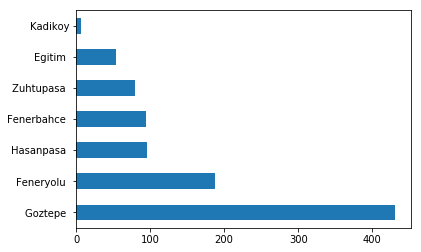

In [21]:
df['Neighborhood'].value_counts().plot.barh();

In [0]:
from pandas.api.types import CategoricalDtype 

In [23]:
# nominal kategorik -> ordinal kategorik deg. çevirme 

kat_df = kat_df.astype(CategoricalDtype(ordered = True))
kat_df.Neighborhood.head(1)

0    Egitim 
Name: Neighborhood, dtype: category
Categories (7, object): [Egitim < Fenerbahce < Feneryolu < Goztepe < Hasanpasa < Kadikoy < Zuhtupasa]

In [0]:
Neighborhood_Categories = ['Egitim','Zuhtupasa','Hasanpasa','Kadikoy','Feneryolu', 'Goztepe', 'Fenerbahce']

In [0]:
kat_df = kat_df.astype(CategoricalDtype(categories = Neighborhood_Categories ,ordered = True))

In [26]:
kat_df.Neighborhood.head(1)

0    NaN
Name: Neighborhood, dtype: category
Categories (7, object): [Egitim < Zuhtupasa < Hasanpasa < Kadikoy < Feneryolu < Goztepe < Fenerbahce]

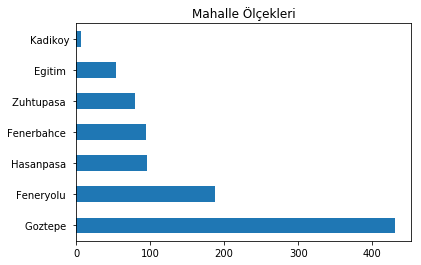

In [27]:
(df['Neighborhood']
 .value_counts()
 .plot.barh()
 .set_title('Mahalle Ölçekleri'));

# ; koyulabilir.

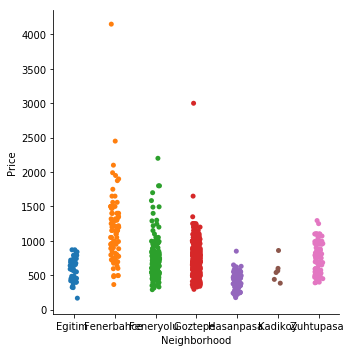

In [29]:
sns.catplot(x = "Neighborhood", y = 'Price' , data = df);

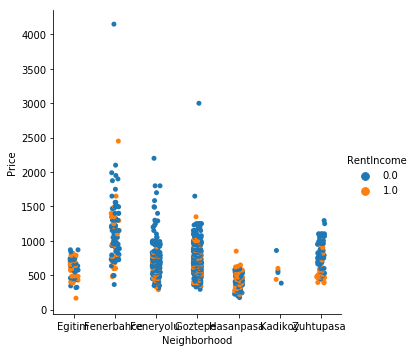

In [31]:
sns.catplot(x = "Neighborhood", y = 'Price' , hue = "RentIncome", data = df);

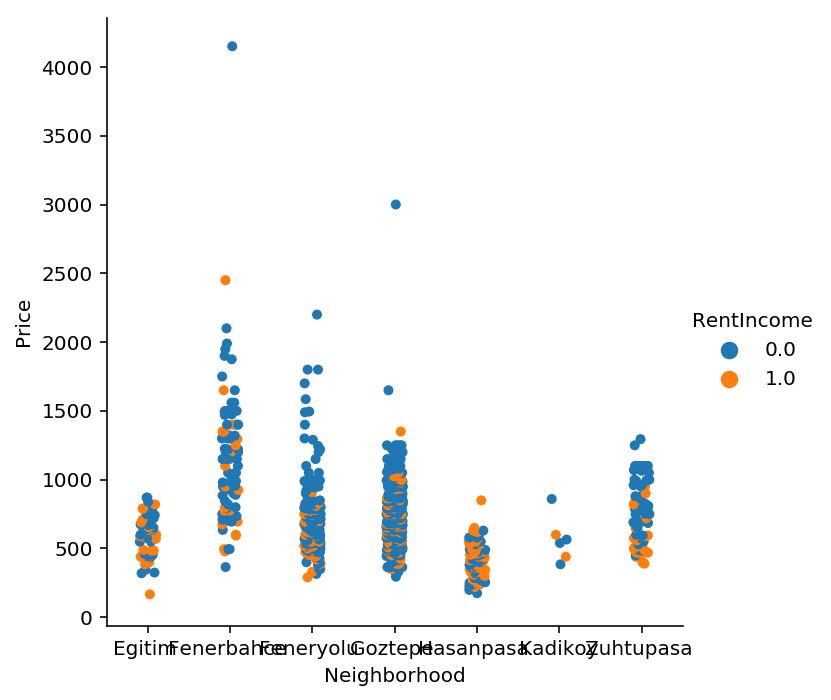

In [32]:
%config InlineBackend.figure_format = 'retina'
sns.catplot(x = "Neighborhood", y = 'Price' , hue = "RentIncome", data = df);

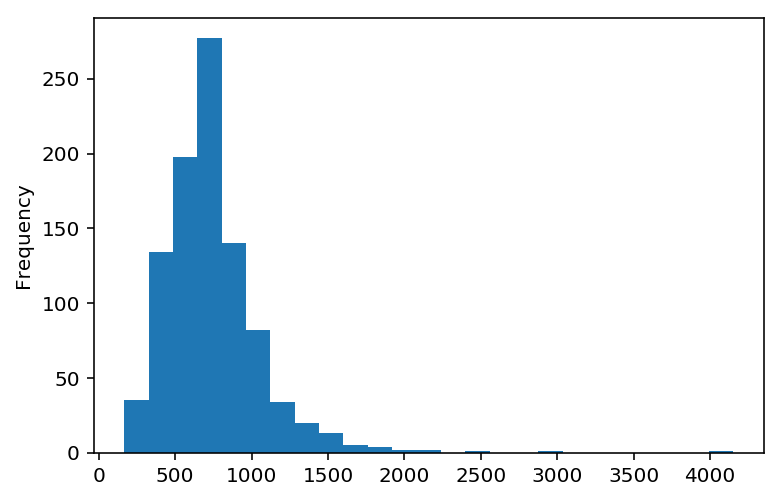

In [36]:
# betimsel istatistiklerden faydalinilir.

(df['Price']
.plot
.hist(bins=25));

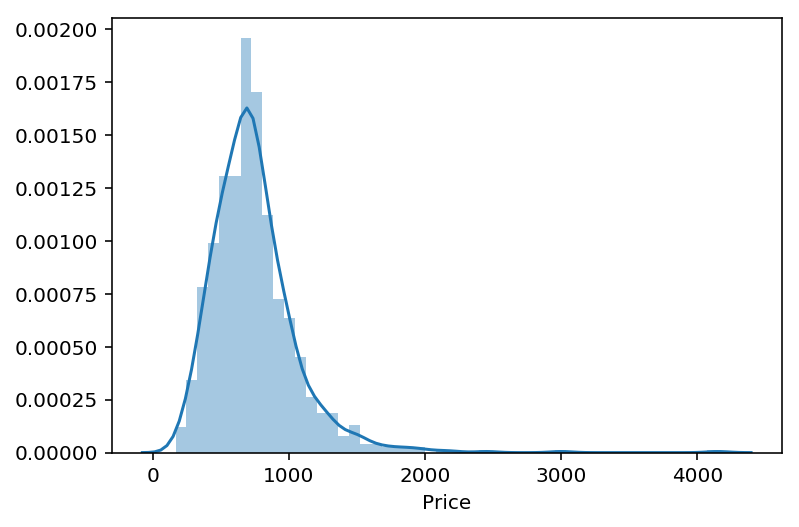

In [37]:
sns.distplot(df.Price);

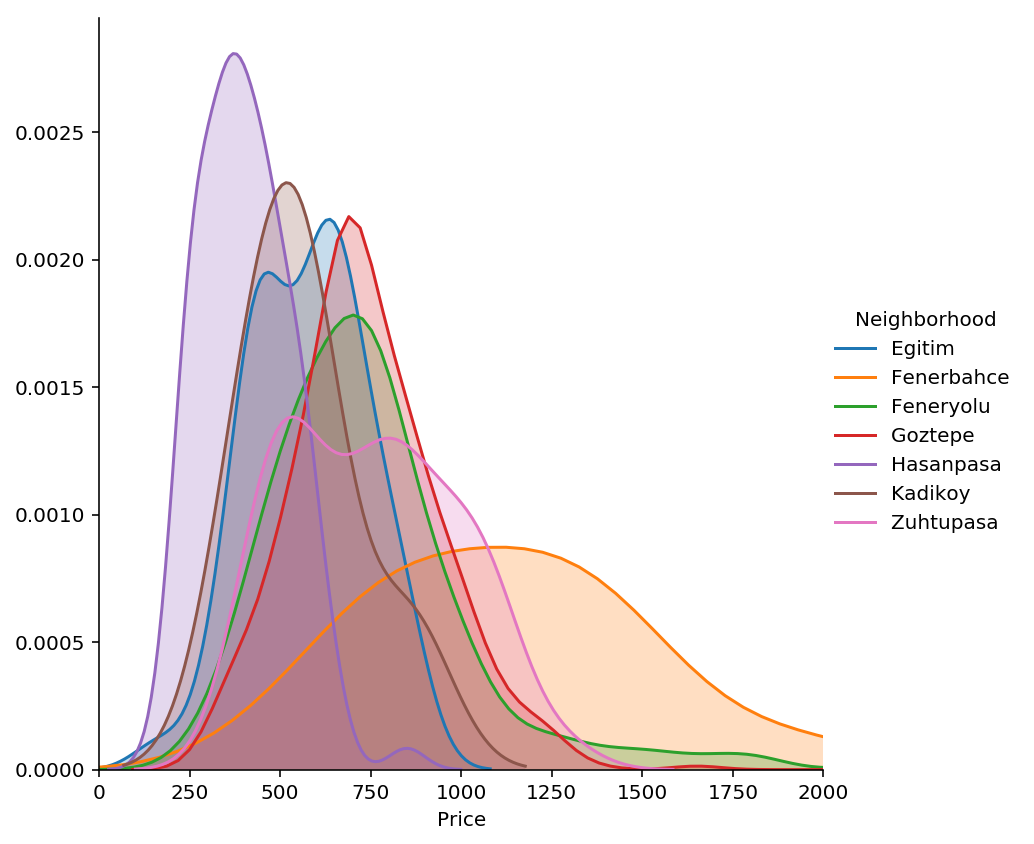

In [47]:
# hangi aralikta ne kadar gozlem olgununa fiyat ve degiskenle caprazlamalar

(sns
    .FacetGrid(df,
             hue = 'Neighborhood',
             height = 6,
             xlim = (0,2000))
    .map(sns.kdeplot, 'Price', shade = True)
    .add_legend()
    );

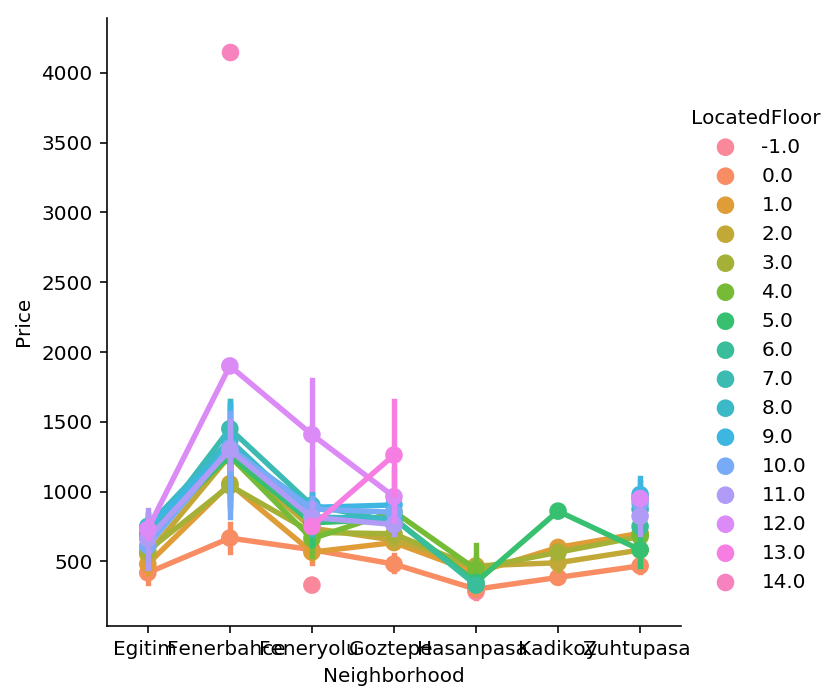

In [51]:
sns.catplot(x = 'Neighborhood', y = 'Price', hue = 'LocatedFloor', kind = 'point', width = 100, data = df);

In [52]:
# Deleting columns
# Delete the "Date" column from the dataframe
# Delete the "Neighborhood" column from the dataframe
# Delete the "Id" column from the dataframe

#houseData = houseData.drop("Date", axis=1)
#houseData = houseData.drop("Neighborhood", axis=1)

houseData.head()

,Id,Neighborhood,Date,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
0,644083584,Egitim,9.05.2019,167.0,65.0,75.0,3.0,30.0,1.0,4.0,1.0,1.0,0.0,1.0
1,696137168,Hasanpasa,28.05.2019,175.0,95.0,100.0,3.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0
2,696813140,Hasanpasa,31.05.2019,199.0,55.0,65.0,2.0,4.0,-1.0,3.0,1.0,0.0,0.0,0.0
3,670399423,Hasanpasa,20.05.2019,220.0,70.0,85.0,3.0,7.0,-1.0,4.0,1.0,1.0,0.0,1.0
4,694947045,Hasanpasa,23.05.2019,225.0,65.0,70.0,3.0,25.0,-1.0,4.0,1.0,1.0,0.0,0.0


In [53]:
print ('Initial shape of the kadikoy HouseData is', houseData.shape)


Initial shape of the kadikoy HouseData is (949, 14)


In [54]:
# Veri tiplerini görelim
houseData.dtypes

Id                 int64
Neighborhood      object
Date              object
Price            float64
NetArea          float64
GrossArea        float64
NumberOfRoom     float64
AgeOfBuilding    float64
LocatedFloor     float64
TotalFloor       float64
Bathroom         float64
Balcony          float64
Furniture        float64
RentIncome       float64
dtype: object

In [55]:
# Tekrarlanan veri kontrolü
houseData[houseData.duplicated(keep=False)]

,Id,Neighborhood,Date,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome


In [56]:
houseData.head(20)

,Id,Neighborhood,Date,Price,NetArea,GrossArea,NumberOfRoom,AgeOfBuilding,LocatedFloor,TotalFloor,Bathroom,Balcony,Furniture,RentIncome
0,644083584,Egitim,9.05.2019,167.0,65.0,75.0,3.0,30.0,1.0,4.0,1.0,1.0,0.0,1.0
1,696137168,Hasanpasa,28.05.2019,175.0,95.0,100.0,3.0,0.0,1.0,5.0,1.0,1.0,0.0,0.0
2,696813140,Hasanpasa,31.05.2019,199.0,55.0,65.0,2.0,4.0,-1.0,3.0,1.0,0.0,0.0,0.0
3,670399423,Hasanpasa,20.05.2019,220.0,70.0,85.0,3.0,7.0,-1.0,4.0,1.0,1.0,0.0,1.0
4,694947045,Hasanpasa,23.05.2019,225.0,65.0,70.0,3.0,25.0,-1.0,4.0,1.0,1.0,0.0,0.0
5,593649128,Hasanpasa,22.05.2019,240.0,75.0,90.0,3.0,7.0,0.0,4.0,1.0,0.0,0.0,1.0
6,593271716,Hasanpasa,18.05.2019,240.0,75.0,75.0,3.0,7.0,-1.0,3.0,1.0,0.0,0.0,1.0
7,688996025,Hasanpasa,29.05.2019,242.0,75.0,85.0,3.0,25.0,0.0,5.0,1.0,1.0,0.0,0.0
8,680865167,Hasanpasa,6.05.2019,245.0,80.0,90.0,3.0,28.0,0.0,6.0,1.0,1.0,0.0,0.0
9,663447041,Hasanpasa,21.02.2019,250.0,60.0,70.0,2.0,30.0,1.0,4.0,1.0,1.0,0.0,0.0


In [0]:
# Kolon isimlerindeki boşlukları silelim.
houseData.columns = houseData.columns.str.replace(' ',"")

# Eksik veri var ise NAN olarak görmek için
houseData.replace(to_replace = "", value = np.NAN,inplace=True)



In [58]:
# Tüm kolon isimlerini görelim
houseData.columns

Index(['Id', 'Neighborhood', 'Date', 'Price', 'NetArea', 'GrossArea',
       'NumberOfRoom', 'AgeOfBuilding', 'LocatedFloor', 'TotalFloor',
       'Bathroom', 'Balcony', 'Furniture', 'RentIncome'],
      dtype='object')

In [0]:
# Del the ID

houseData = houseData.drop("Id", axis=1)

In [60]:
# Eksik veri iceren kolon-satır sayısını görelim
houseData.columns[houseData.isnull().sum() != 0].size

0

In [61]:
# Eksik veri içeren kolonlar ve satirlar
houseData.columns[houseData.isnull().sum() != 0]

Index([], dtype='object')

In [62]:
# Her sütunda kaç eksik gözlem olduğunu görelim
houseData.loc[:,houseData.columns[houseData.isnull().sum() != 0]].isnull().sum().sort_values()

Series([], dtype: float64)

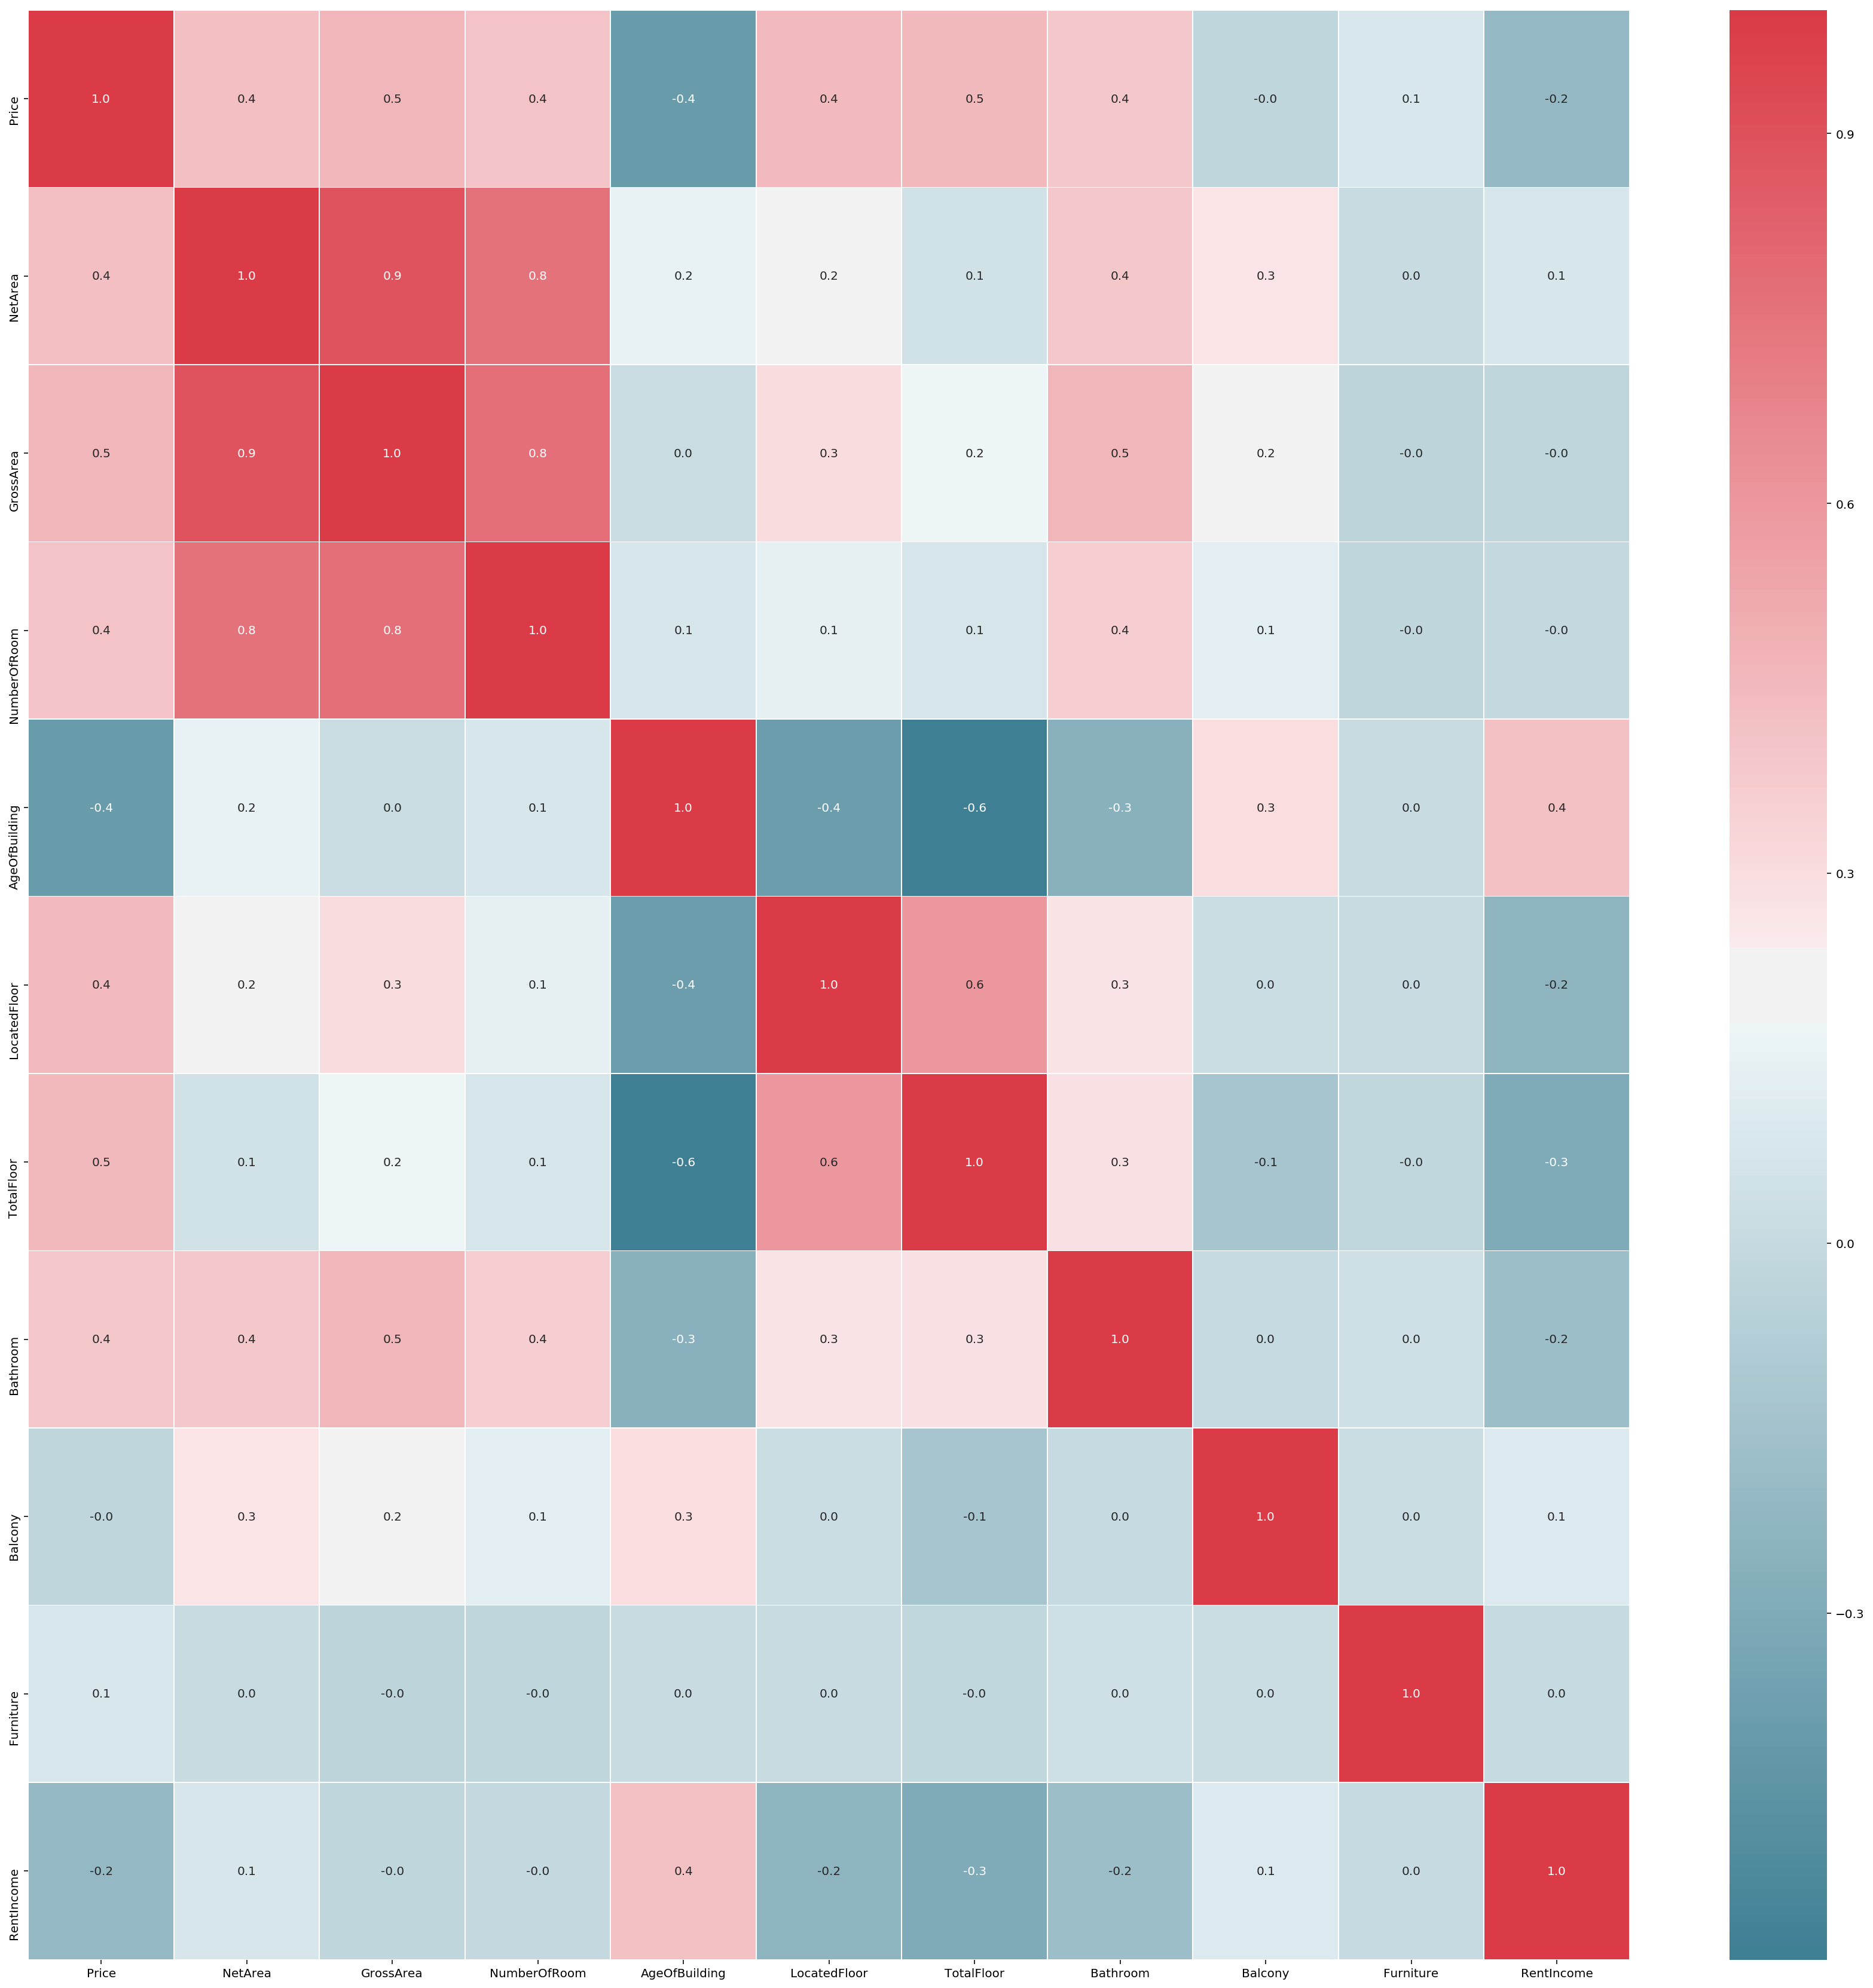

In [63]:
# Display the correlation heatmap

fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1)
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(houseData.corr(), cmap=colormap, annot=True, linewidths=.4, fmt='.1f', ax=ax)

In [0]:
# Sorted the most important features correlated to Sale Price
corr = houseData.corr()
corr.sort_values(["Price"], ascending = False, inplace = True)
print("Most important feature correlated to Sale Price")
print(corr.Price)

In [0]:
# Show the correlation summary
houseData.corr()

In [0]:
# Get information from column 'SalePrice'
# We will see that the SalePrice minimum value is greater than zero.
houseData['Price'].describe()

In [0]:
# Looking for outliers
plt.scatter(x = houseData.NetArea, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of NetArea and SalePrice Initial")
plt.xlabel("NetArea")
plt.ylabel("SalePrice")
plt.show()

In [0]:
# Remove these outliers to make a good prediction later on
houseData = houseData.drop(houseData[(houseData['NetArea']>100)].index)
houseData = houseData.drop(houseData[(houseData['Price']>2000)].index)

In [0]:
# Display the graph after three outliers have been removed
plt.scatter(x = houseData.NetArea, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of NetArea and SalePrice Initial")
plt.xlabel("NetArea")
plt.ylabel("SalePrice")
plt.show()

In [0]:
# Plot 'SalePrice' and 'AgeOfBuilding' 
plt.scatter(x = houseData.AgeOfBuilding, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and AgeOfBuilding")
plt.xlabel("AgeOfBuilding")
plt.ylabel("Price")
plt.show()

In [0]:
# Plot 'SalePrice' and 'Balcony'
plt.scatter(x = houseData.Balcony, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and 'Balcony' (Evaluates the quality of the material on the exterior)")
plt.xlabel("Balcony")
plt.ylabel("Price")
plt.show()

In [0]:
# Plot 'SalePrice' and 'Rentable'
plt.scatter(x = houseData.RentIncome, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and 'RentIncome' (Evaluates the quality of the material on the exterior)")
plt.xlabel("RentIncome")
plt.ylabel("Price")
plt.show()

In [0]:
# Plot 'SalePrice' and 'NumberOfRoom'
plt.scatter(x = houseData.NumberOfRoom, y = houseData.Price, c = "blue", marker = "s")
plt.title("Scatter Plot of SalePrice and 'NumberOfRoom' (Evaluates the quality of the material on the exterior)")
plt.xlabel("NumberOfRoom")
plt.ylabel("Price")
plt.show()

In [0]:
# Check the distribution of label values (SalePrice)
sns.distplot(houseData['Price'])


In [0]:
# Skewness metric
houseData['Price'].skew()

The skewness value > 1 ==> data is highly skewed. We can use Logarithm transformation to normalize the SalePrice data. A normalized label helps in better modeling the relationship between label values and independent features.

In [0]:
normalized_saleprice = np.log(houseData['Price'])
print('Check skewness:', normalized_saleprice.skew())

In [0]:
sns.distplot(normalized_saleprice)